In [31]:
import keras
import numpy as np
from keras.datasets import reuters
from keras import layers, models

In [32]:
(trainX,trainY),(testX,testY) =reuters.load_data(num_words = 10000)

In [33]:
def vectorize(x, dim=10000):
    vectorizedX = np.zeros((len(x),dim))
    for i,sequence in enumerate(x):
        vectorizedX[i][sequence] =1
    return vectorizedX

def toOneHot(x, dim=46):
    vectorizedX = np.zeros((len(x),dim))
    for i,sequence in enumerate(x):
        vectorizedX[i][sequence] =1
    return vectorizedX



trainY = toOneHot(trainY)
testY = toOneHot(testY)


trainX = vectorize(trainX)
testX = vectorize(testX)




In [34]:
valX = trainX[:1000]
trainX = trainX[1000:]
valY = trainY[:1000]
trainY = trainY[1000:]

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape =(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
modelFit = model.fit(trainX,trainY, epochs=20, batch_size=512, validation_data = (valX,valY))

Epoch 1/20
16/16 [==============================] - 0s 29ms/step - loss: 2.6874 - accuracy: 0.4877 - val_loss: 1.7903 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4225 - accuracy: 0.7165 - val_loss: 1.3005 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0305 - accuracy: 0.7853 - val_loss: 1.1366 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8051 - accuracy: 0.8319 - val_loss: 1.0155 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6388 - accuracy: 0.8723 - val_loss: 0.9810 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5087 - accuracy: 0.8985 - val_loss: 0.9452 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4128 - accuracy: 0.9156 - val_loss: 0.9156 - val_accuracy: 0.8080
Epoch 8/20
16

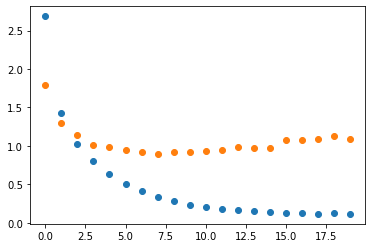

In [37]:
modelHist = modelFit.history
modelHist

import matplotlib.pyplot as plt
plt.scatter(range(len(modelHist['loss'])),modelHist['loss'])
plt.scatter(range(len(modelHist['loss'])),modelHist['val_loss'])

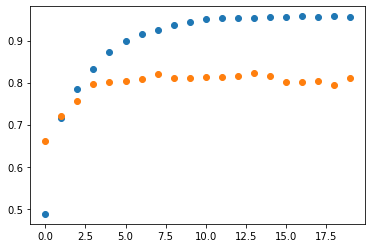

In [38]:
plt.scatter(range(len(modelHist['loss'])),modelHist['accuracy'])
plt.scatter(range(len(modelHist['loss'])),modelHist['val_accuracy'])

In [41]:
np.argmax(model.predict(testX)[0])

3

In [43]:
model.predict(testX)[0]

array([1.4862701e-05, 4.7839359e-05, 5.4091892e-08, 9.3599749e-01,
       6.1257455e-02, 4.0687116e-08, 3.3243106e-07, 1.6858183e-05,
       8.8876591e-04, 1.6746360e-06, 3.3109085e-05, 3.3845584e-04,
       3.1157080e-05, 3.1625103e-05, 3.6829695e-07, 5.4062315e-07,
       5.2943851e-05, 9.0549435e-07, 1.5096107e-05, 2.1549435e-04,
       1.5584439e-04, 5.6464149e-04, 4.1269122e-06, 1.5252061e-05,
       7.0466052e-07, 1.0294140e-05, 3.0599469e-07, 3.5087149e-07,
       7.0305528e-06, 4.2805600e-06, 1.0381158e-04, 1.7645021e-06,
       4.6234259e-06, 6.0150987e-06, 1.6881928e-05, 8.2031227e-05,
       4.5232446e-05, 2.5681654e-08, 1.6522154e-05, 1.1961631e-05,
       6.5202772e-07, 8.0108822e-07, 1.2638513e-06, 1.2927403e-07,
       4.3407056e-08, 3.1781292e-07], dtype=float32)